In [1]:
import pandas as pd
import numpy as np
import random
import math
from copy import deepcopy
import random
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise 
import sklearn.neighbors as N

In [2]:
def rbf_inbuilt(a, b, var):
    return sklearn.metrics.pairwise.rbf_kernel(a, b,)

In [3]:
def rbf_def(a,b,var):
    t = math.pow(np.linalg.norm(a - b),2)
    var = -var*t
    return math.exp(var)

In [4]:
df_1 = pd.read_csv('Dataset_1.csv', names = ['a','b','c'])
df_2 = pd.read_csv('Dataset_2.csv', names = ['a','b','c'])
df_3 = pd.read_csv('Dataset_3.csv', names = ['a','b','c'])

In [5]:
def spec(df, n):
    df = df.values[:,:-1]
    A = np.ones((df.shape[0], df.shape[0]))
    for i in range(df.shape[0]):
        for j in range(i+1,df.shape[0]):
            dist = rbf_def(df[i], df[j], 0.5)
            A[i,j] = dist
            A[j,i] = dist
    A = N.kneighbors_graph(A, n, mode='distance')
    A = A.toarray()
    D = np.zeros((df.shape[0], df.shape[0]))
    A_sum = A.sum(axis =1)
    for i in range(df.shape[0]):
        D[i,i] = A_sum[i]
    L = D-A
    eigval, eigvec = np.linalg.eig(L)
    eigval = np.argsort(eigval.real)
    new_vec = eigvec[:,eigval].real
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=3, random_state=0).fit(new_vec[:,:3])
    return kmeans.labels_

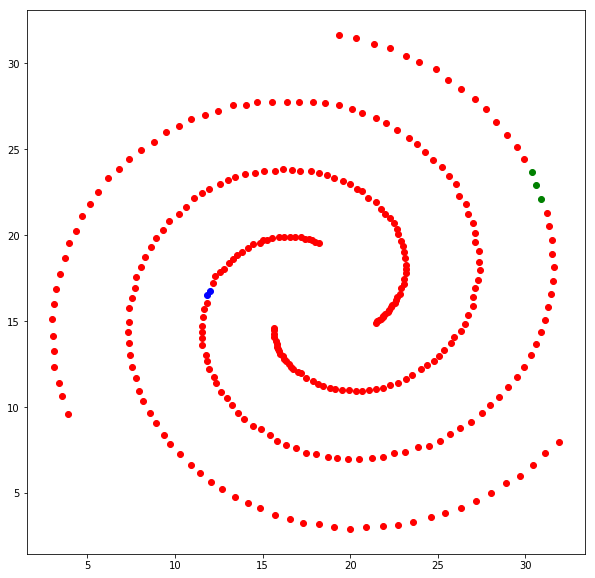

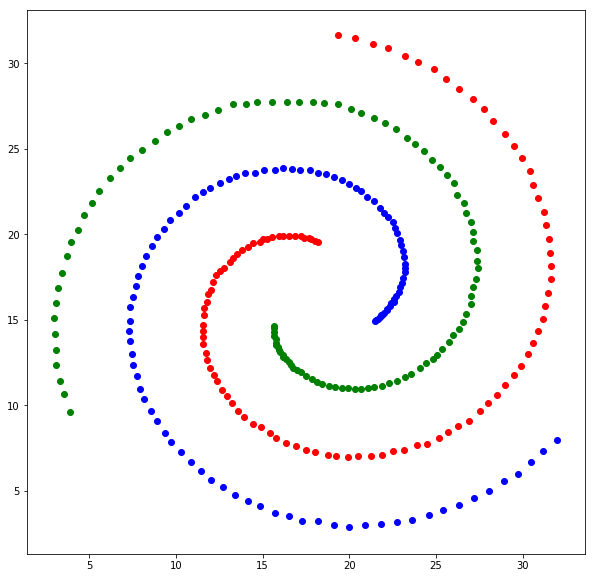

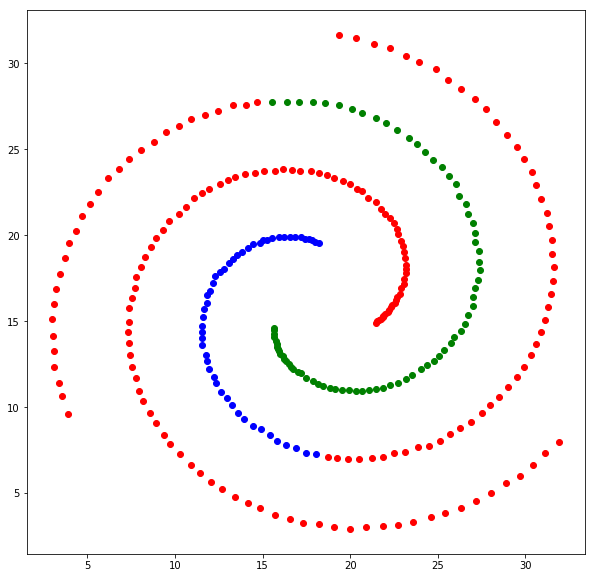

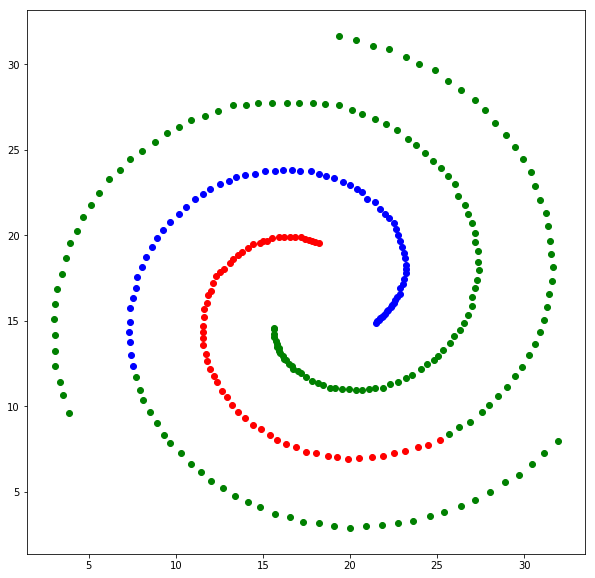

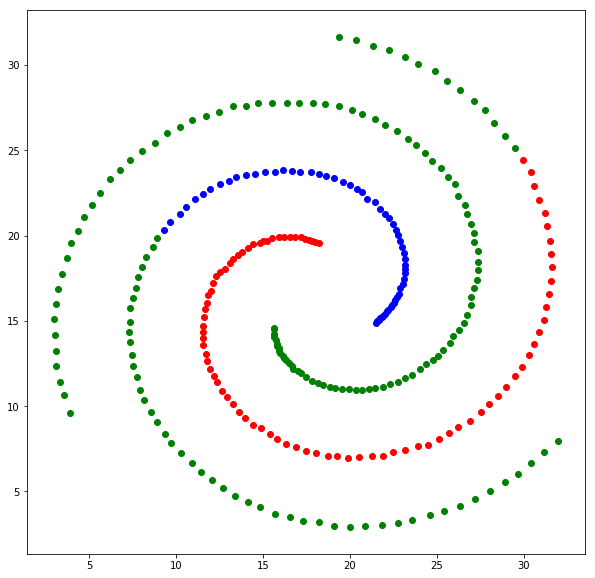

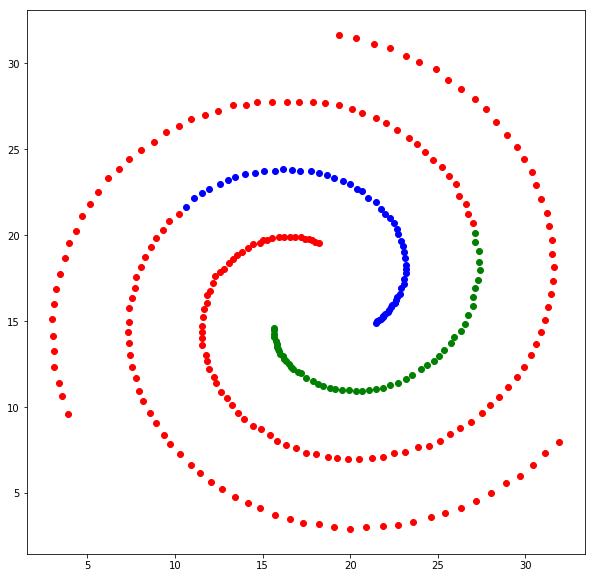

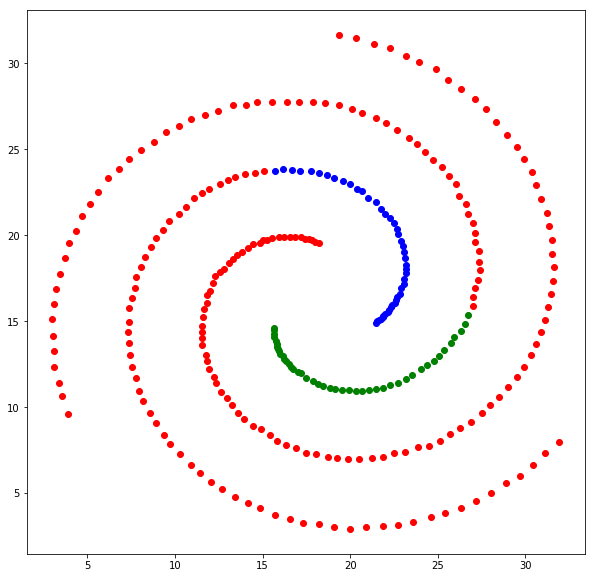

In [7]:
for i in range(1,8):
    lab = spec(df_3, i)
    col = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
    plt.figure(figsize=(10,10))
    for i in range(3):
        temp = df_3.values[lab==i] 
        plt.scatter(temp[:,0], temp[:,1], c = col[i])
    plt.show()